**Florida Uber Rides Data Analysis w/ Python**

---

**Importing and Understanding the Dataset**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the beginning of the dataset to understand what it comprises of.

In [44]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Find shape of dataset

In [45]:
dataset.shape

(1156, 7)

In-depth understanding of the dataset

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


---

**Data Preprocessing**

There is a lot of *null* values in the **purpose** column. This ensures all records are accounted for in the analysis, as it allows for a clearer understanding.

In [47]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\3227455908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


Will also be changing *START_DATE* and *END_DATE* to the date_time format for the same reasons.

In [48]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

Now we split the *START_DATE* into date and time columns, and then convert them into four different categories for a similar reason, to make sure the analysis of the data is more in-depth.

In [49]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'], bins=[0, 10, 15, 19, 24],
                              labels=['Morning','Afternoon','Evening','Night'])


Drop rows with null values and duplicates as they are unnecessary.

In [50]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

---

**Data Visualization**

Begin by checking the unique values in the dataset of the columns with the object datatype.

In [51]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Now we visualize tha data using a *countplot* for the *CATEGORY* and *PURPOSE* columns.

C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\3901158697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY', data=dataset, ax=ax1, palette='viridis')
C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\3901158697.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\3901158697.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PURPOSE', data=dataset, ax=ax2, palette='coolwarm')
C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\3901158697.py:9: UserWarning: set_ticklabels() should o

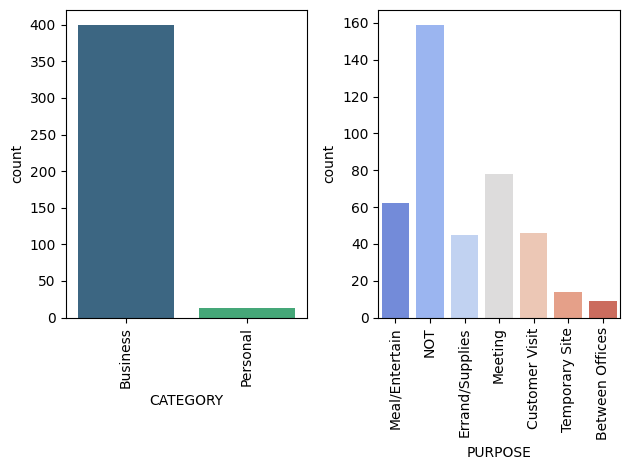

In [52]:
# First subplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset, ax=ax1, palette='viridis')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Second subplot
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset, ax=ax2, palette='coolwarm')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

As can be seen above, the majority of uber rides were business use, with no description of what their true purpose was.

Now, let's do the same for the time column. 

C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\2936677235.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day-night', data=dataset, ax=ax1, palette='viridis')
C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\2936677235.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


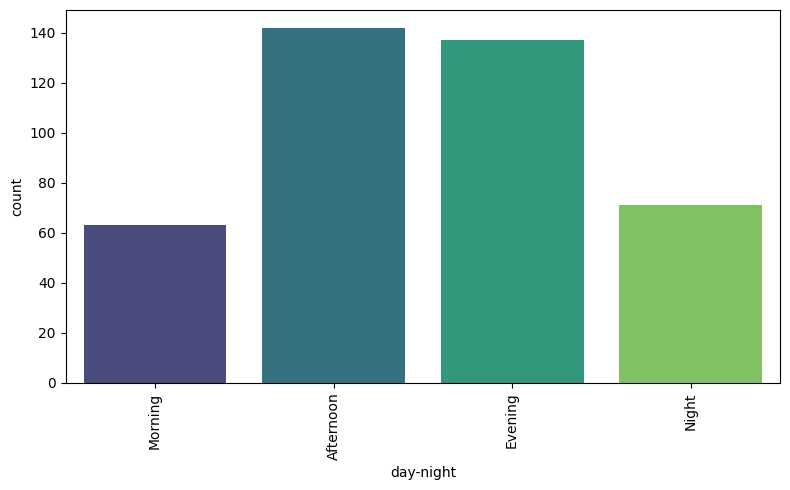

In [53]:
# Create a figure for the plot
plt.figure(figsize=(8, 5))

# Create a single subplot
ax1 = plt.subplot(1, 1, 1)

# Use seaborn countplot with the specified palette
sns.countplot(x='day-night', data=dataset, ax=ax1, palette='viridis')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

We can see that most of the Ubers are booked in the afternoon/evening so from the time interval of 10am-5pm.

Now to compare the two different categories along with the *PURPOSE* of the user.

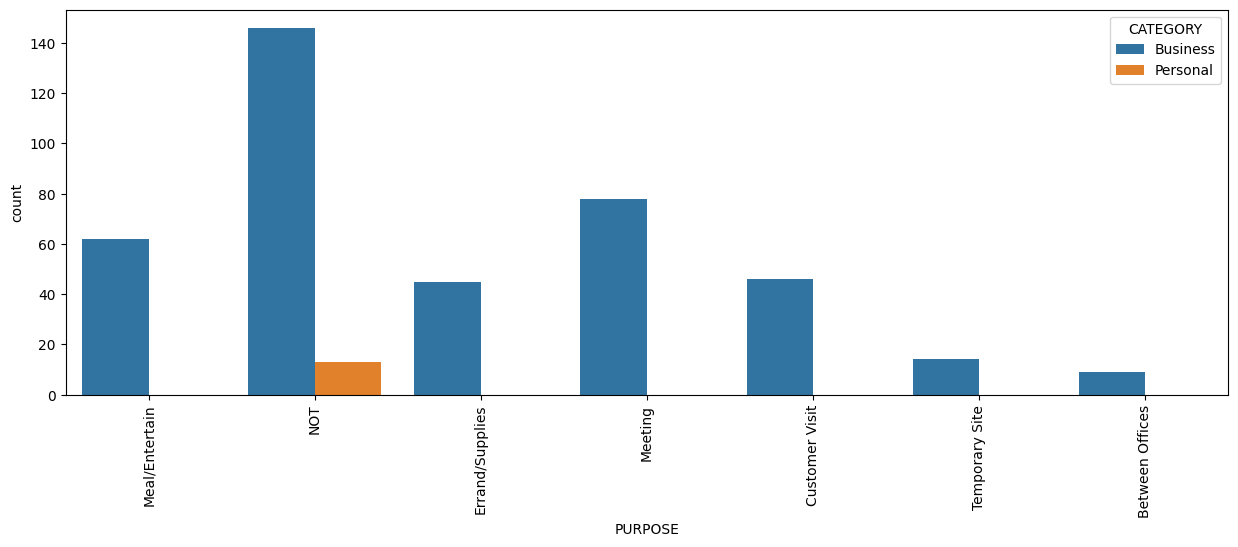

In [54]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

Disregarding the NOT, we can see tha most people book Ubers for meetings or meal/entertainment purposes.

From what has been done to this point we can see that *CATEGORY* and *PURPOSE* are two very important columns. So, **OneHotEncoding** will be used to categorize them.

**One Hot Encoding** - a method used in data preprocessing to convert categorical variables into a binary matrix (0s and 1s), where each unique category is represented as a separate column with a value of 1 indicating the presence of that category and 0 otherwise.

In [55]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']

print(dataset.columns)

# Create the OHE with the updated parameter
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Align indices and assign feature names
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop the original categorical columns and concatenate the one-hot encoded columns
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night'],
      dtype='object')


<Axes: >

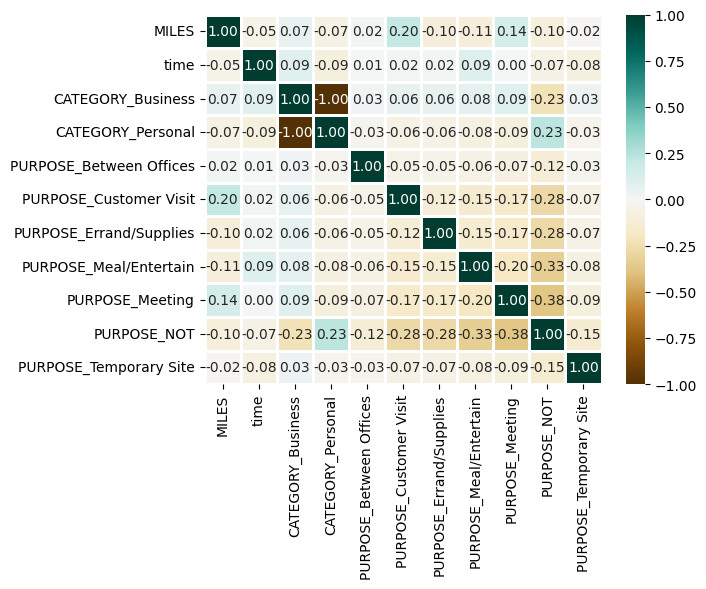

In [56]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

From the Heatmap we can see that the *Business* and *Personal* Category are highly negatively correlate. We proved this previously, this just serves as confirmation. It also tells us that there is generally not much correlation between features.

Now we visualize the month data in the same way we did for hours.

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

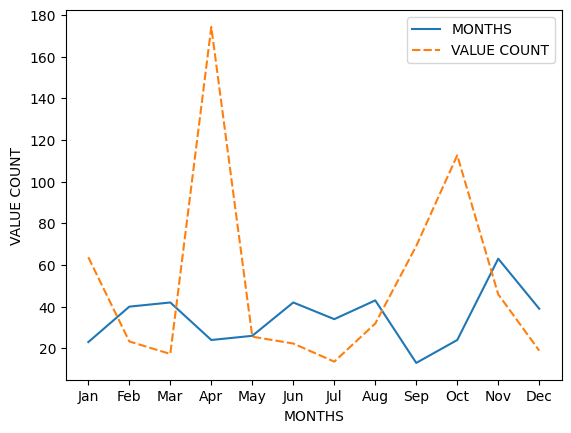

In [64]:
# Extract the month from the 'START_DATE' column and create a new column 'MONTH'
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

# Define a mapping dictionary to convert numeric months to abbreviated month names
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr', 5.0: 'May', 
               6.0: 'Jun', 7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 
               11.0: 'Nov', 12.0: 'Dec'}

# Map the numeric months in the 'MONTH' column to their abbreviated names using the dictionary
dataset["MONTH"] = dataset.MONTH.map(month_label)

# Count the number of rides for each month, ensuring the counts are not sorted
mon = dataset.MONTH.value_counts(sort=False)

# Create a DataFrame to analyze month-wise data
# "MONTHS" column: Total ride counts for each month
# "VALUE COUNT" column: Maximum miles traveled for rides grouped by month
df = pd.DataFrame({
    "MONTHS": mon.values, 
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()
})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


From the lineplot we can see that the counts are very irregular. Nevertheless, it is still clear that the counts are much less during Nov, Dec, and Jan which aligns with the winter season in Florida. 

Visualize the days data:

Text(0, 0.5, 'COUNT')

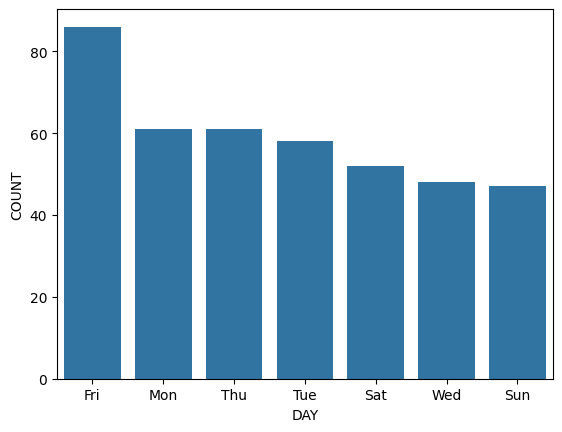

In [65]:
# Extract the day of the week from 'START_DATE' and create a new column 'DAY'
# 0 = Monday, 1 = Tuesday, ..., 6 = Sunday
dataset['DAY'] = dataset.START_DATE.dt.weekday

# Define a mapping dictionary to convert numeric weekdays to their names
day_label = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Map the numeric weekdays in the 'DAY' column to their day names
dataset['DAY'] = dataset['DAY'].map(day_label)

# Count the number of rides for each day of the week
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

Now we can analyze the miles column using a boxplot:

<Axes: ylabel='MILES'>

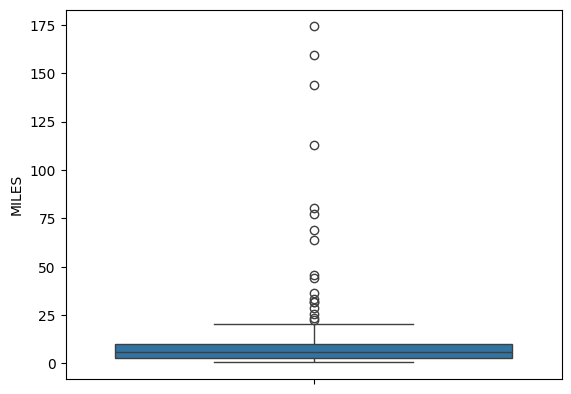

In [59]:
sns.boxplot(dataset['MILES'])

Too much concurrent data for the graph to be clearly understandable. Zooming in will help:

<Axes: ylabel='MILES'>

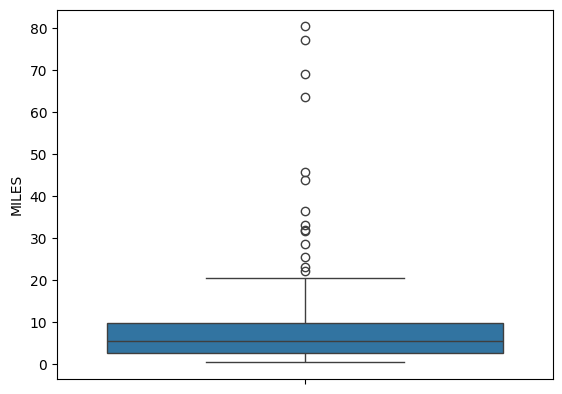

In [60]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

Provides a bit more clarity but an alternative plot at a higher zoom will allow for even more understanding.

C:\Users\Jorwi\AppData\Local\Temp\ipykernel_38280\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

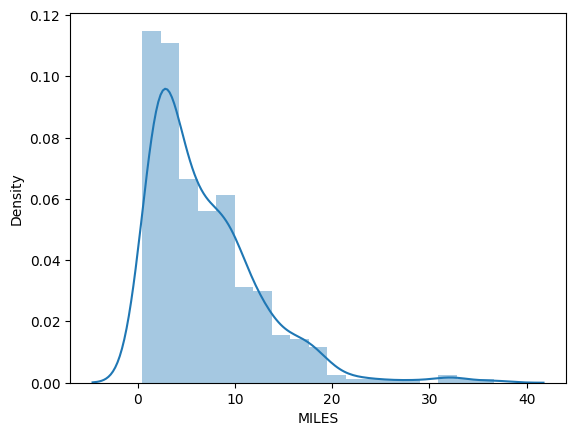

In [63]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

The Final insights we can draw are:
- Most of the Ubers are booked for 1-4 mile distances.
- The vast majority of users book rides for 1-19 miles.
- For 20+ mile rides the number booked is nearly negligible. 